# Analyse the Trappist 1 System of Exoplanets!
## Your goal is to calculate the Mass of the M-type Red Dwarf Host Star
## The ```keplerian_orbits.ipynb``` you completed earlier will be useful for this notebook
In 2016 the [Trappist 1 System of Exoplanets](https://exoplanets.nasa.gov/trappist1/) was discovered by the ESA Southern Observatory's Very Large Array Telescope in Chile and the Caltech Spitzer Space Telescope.  This is a planetary system that could possibly sustain life forms and astronomers ar very excited to learn further.  The Trappist 1 system is a very important target for the [James Webb Space Telescope](https://webb.nasa.gov/)!
![habzones](trap1_habitable_zones.png)

## Task1: 
### Find and add images of Trappist 1 System of exoplanets to this Jupyter Notebook
1. Google "Trappist 1 Exoplanets NASA" in a separate bowser or use links above. 
    - You will find lots of images of Trappist 1 system to choose from!
1. Capture some screen shots to include in this notebook
1. Rename screen shots on your laptop to trappist1, trappist2 etc
1. Upload to this notebook by dropping them on the left panel
1. Modify code cell below to display them
1. Do not forget to hit "Shift-Enter" to execute each cell as you go along!

![trap1](trap1.png)

![trap2](trap2.png)

## Task 2
### Import python modules and setp constants we need for calulations

In [2]:
# Import modules that contain functions we need
import pandas as pd # pandas is common for data science
import numpy as np #N umPy is used a lot in science
import math # we need the math class for pi
%matplotlib inline 
import matplotlib.pyplot as plt # MatPlotLib is the plotting standard
import seaborn as sns # makes regression plot easy
from scipy import stats # lets us do a linear regression

## Constants we need to analyze the Trappist 1 exoplanets
1. The astromical unit (AU) in meters: ```d_au```
1. Newton's Universal gravitational constant in SI units: ```G```
1. Mass of the Sun in kilograms: ```M_sun```
$$
d_{au}=1.5\times10^{11} \mathrm{m} \\
G=6.67\times10^{-11} \mathrm{Nm^2/kg^2} \\
M_{sun}=1.989\times10^{30} \mathrm{kg}
$$


In [3]:
# Type the constants here.
# Example: 3*10^8 in Python would be 3e8
d_au = 1.5e11 #ADD ASTRONOMICAL UNIT IN METERS #type_in_constants_here
G = 6.67e-11 #ADD GRAVITATIONAL CONSTANT IN NM^2/KG^2 #type_in_constants_here
M_sun = 1.989e30 #ADD MASS OF SUN IN KG #type_in_constants_here

## Task 3
### Read and display Trappist 1 Exoplanet Data ```csv``` file by adding to the code cell below
This dataset is based on the discovery of an exolplanet system by the ESA Southern Observatory's Very Large Array Telescope in Chile and the Caltech Spitzer Space Telescope.
1. Read and the data that will be used for the calculations.
1. Create a dataframe data1 with the date you just read in
1. Print the dataframe

In [4]:
# Read and the data that will be used for the calculations.
# create a dataframe data1 with the table you just read in
data1 = pd.read_csv("trappist_planetary_data.csv") # NAME OF CSV FILE WITH TRAPPIST 1 DATA
print(data1)

  Planet  Mass (earth mass)  Semimajor axis (AU)  Orbital period (earth days)  \
0      b             1.3771              0.01154                     1.510826   
1      c             1.3105              0.01580                     2.421937   
2      d             0.3885              0.02227                     4.049219   
3      e             0.6932              0.02925                     6.101013   
4      f             1.0411              0.03849                     9.207540   
5      g             1.3238              0.04683                    12.352446   
6      h             0.3261              0.06189                    18.772866   

   Eccentricity  Inclination  Radius (earth radius)  
0       0.00622       89.728                  1.116  
1       0.00654       89.778                  1.097  
2       0.00837       89.896                  0.778  
3       0.00510       89.793                  0.920  
4       0.01007       89.740                  1.045  
5       0.00208       89.74

## Task 4
### Extract the 'Semimajor axis (AU)' and 'Orbital period (earth days)' colums from the ```data``` table
1. Create a dataframe for Semimajor axis and convert to meters
1. Assign this to an np.array() ```a_m```
1. Create a dataframe for Orbital period
1. Assign this to an np.array() ```p_s```
1. Print each

In [5]:
a_m = np.array(data1['Semimajor axis (AU)']*d_au)
p_s = np.array(data1['Orbital period (earth days)']*24*60*60)
print(a_m)
print(p_s)

[1.7310e+09 2.3700e+09 3.3405e+09 4.3875e+09 5.7735e+09 7.0245e+09
 9.2835e+09]
[ 130535.3664  209255.3568  349852.5216  527127.5232  795531.456
 1067251.3344 1621975.6224]


## Task 3
### Create 2 separate plots and create a linear regression
1. Create non-linear scatter/line plot of ```p_s``` (y axis) versus ```a_m``` (x axis) with a proper title and axis labels
1. Create linearized scatter/line plot of ```p_s**2``` (y axis) versus ```a_m**3``` (x axis) with a LATEX title and axis label3
1. Call the function ```stats.linregress(x,y)``` to get the ```slope```

Text(0, 0.5, 'Orbital Period (seconds)')

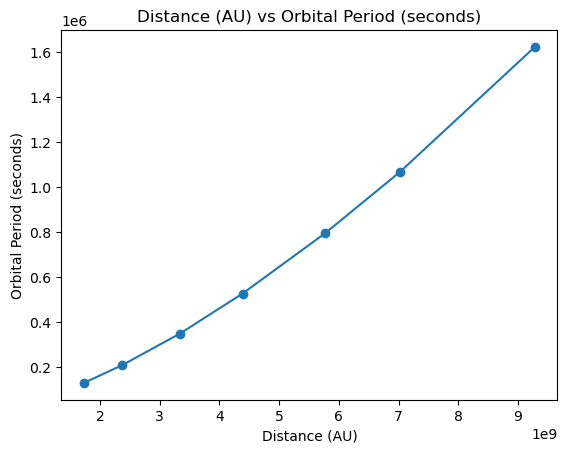

In [6]:
# non-linear plot 1
plt.scatter(a_m, p_s)
plt.plot(a_m, p_s)
plt.title("Distance (AU) vs Orbital Period (seconds)")
plt.xlabel("Distance (AU)")
plt.ylabel("Orbital Period (seconds)")

Text(0, 0.5, 'Orbital Period (seconds)^2')

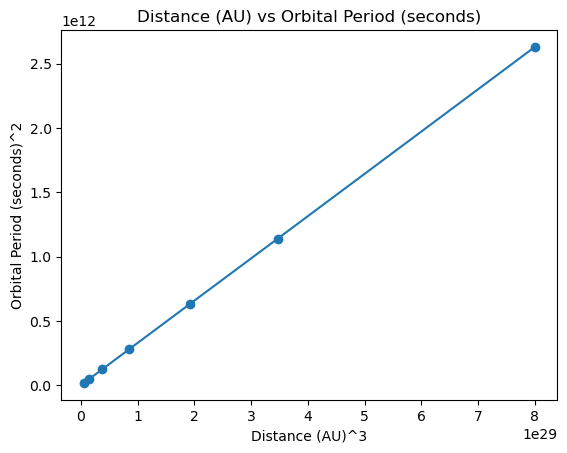

In [8]:
# linearized plot 2
plt.scatter(a_m**3, p_s**2)
plt.plot(a_m**3, p_s**2)
plt.title("Distance (AU) vs Orbital Period (seconds)")
plt.xlabel("Distance (AU)^3")
plt.ylabel("Orbital Period (seconds)^2")

In [9]:
# get coefficients of our linear fit
slope, intercept, r_value, p_value, std_err = stats.linregress(a_m**3,p_s**2)
print(slope)

3.2879939702025396e-18


## Task 5
### Use Newton's form of the Kepler's 3rd law to find the Mass of the Red Dwarf Star
1. Kepler's 3rd law $$ {p\_s}^2\ =\ \frac{4\pi^2}{G \times M\_star} \times {a\_m}^3 $$
1. Set ```slope``` equal to $$ slope=\frac{4\pi^2}{G \times M\_star} $$
1. Rearrange to find ```M_star```
1. Finally caculate and print the ratio of M_star to M_sun

In [11]:
# Use the algebraically rearranged slope expression
# to find the mass of the star in this system.
M_star = (4*math.pi**2)/(G*slope)

print(f'Mass of Central Star in the Kepler 11 System {M_star:1.3e} kg')

# Find the ratio of this star's mass to that of the sun, given above.
ratio = M_star / M_sun

# Display the ratio.
print(f'ratio of masses = {ratio:1.3f}')

Mass of Central Star in the Kepler 11 System 1.800e+29 kg
ratio of masses = 0.091


# Compare with actual result quoted in wikipedia
[Trappist 1 System has a red dwarf central star](https://en.wikipedia.org/wiki/TRAPPIST-1) with mass ```get fraction of solar mass from link``` * mass of our Sun

In [12]:
fraction_of_solar_mass = 0.0898 # See the Mass in link above under "Details"
percent_error = (M_sun*fraction_of_solar_mass - M_star)/M_sun
print(f'percent error in calculating mass of Trappist 1 central red dwarf star is: {percent_error*100:1.3f}% !!')

percent error in calculating mass of Trappist 1 central red dwarf star is: -0.070% !!
